# Лабораторная работа 4 | Рылов А.Д М80-407Б-21

## 1. Выбор начальных условий


Для задачи регрессии взят [набор данных](https://www.kaggle.com/datasets/bilalabdulmalik/top-300-asian-universities-qs-rankings-2024) – датасет метрик университетов азиатских стран. Целевая метрика – столбец `Overall Score`. Соответственно, выбраны следующие метрики качества:

1. **Mean Absolute Error (MAE)** – среднее отклонение прогноза модели от истинного значения.
  
2. **Mean Squared Error (MSE)** – среднеквадратичная ошибка для выявления крупных отклонений в прогнозах.
   
3. **Root Mean Squared Error (RMSE)** – Корень из среднеквадратичной ошибки для сравнения с MAE.
   
4. **R-squared (R²)** – коэффициент детерминации для сравнения со средним значением

**Практическая ценность**: Выяснить, какие факторы оказывают наибольшее влияние на качество образования в университете.

Для задачи классификации взят [набор данных](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset) – датасет с характеристиками грибов (размеры шляпки, цвет ножки и тд). Целевой переменной является столбец `class`` (Poisonous or Not, т.е. ядовитый гриб или нет, True если ядовитый). Соответственно, выбраны следующие метрики качества::

1. **Accuracy** – Точность для оценки общей точности модели
2. **Precision** – Точность для положительного класса чтобы минимизировать ложные срабатывания
3. **Recall** – Полнота, для минимизации ложных отрицаний

4. **F1-score** – Среднее гармоническое Precision и Recall

**Практическая ценность**: модель, обученную на этом наборе данных могут использовать дроны-сборщики съедобных грибов (или, наоборот, ядовитых).

## 2.1	Создание бейзлайна (регрессия)

In [1]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor


file_path = '/content/topuniversities.csv'
data = pd.read_csv(file_path)
data.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


In [2]:
target = "Overall Score"
features = [
    "Citations per Paper", "Papers per Faculty", "Academic Reputation",
    "Faculty Student Ratio", "Staff with PhD", "International Research Center",
    "International Students", "Outbound Exchange", "Inbound Exchange",
    "International Faculty", "Employer Reputation"
]

X = data[features]
y = data[target]

X_filled = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X_filled, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)

MAE: 3.3525666666666627
MSE: 17.027267433333307
RMSE: 4.126410962729392
R-squared: 0.9533318120215435


Сразу же получена высокая точность, значит, архитектура оптимальна, можно только попробовать подобрать гиперпараметры

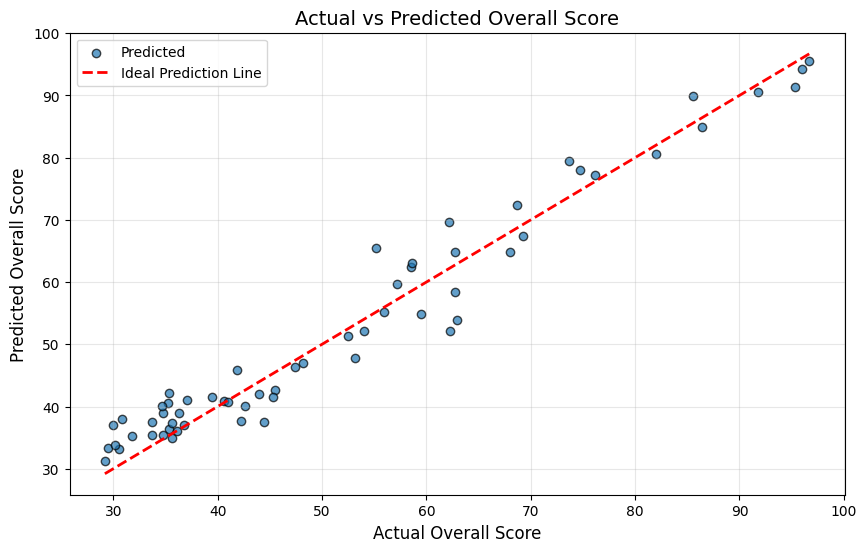

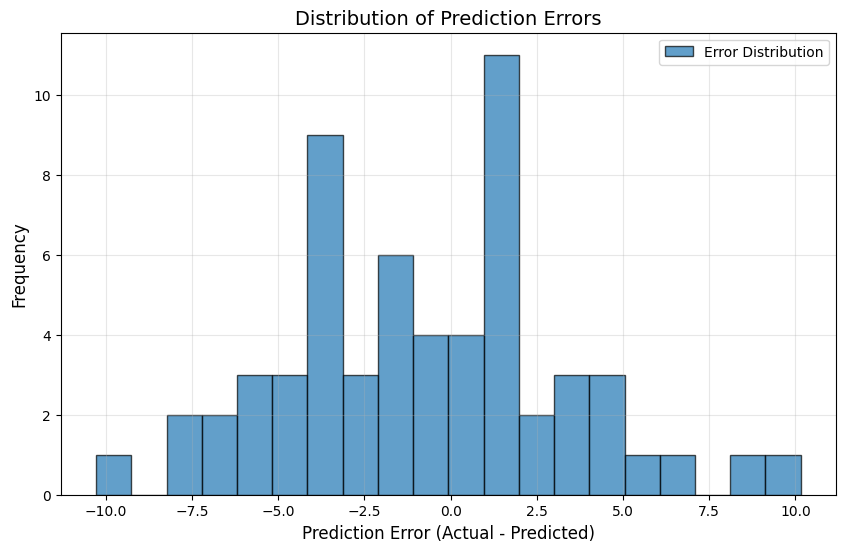

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Prediction Line')
plt.xlabel('Actual Overall Score', fontsize=12)
plt.ylabel('Predicted Overall Score', fontsize=12)
plt.title('Actual vs Predicted Overall Score', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

errors = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20, edgecolor='k', alpha=0.7, label='Error Distribution')
plt.xlabel('Prediction Error (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()


## 3.1	Улучшение бейзлайна (регрессия)

### Как можно улучшить
+ Подобрать гиперпараметры


In [ ]:
target = "Overall Score"
features = [
    "Citations per Paper", "Papers per Faculty", "Academic Reputation",
    "Faculty Student Ratio", "Staff with PhD", "International Research Center",
    "International Students", "Outbound Exchange", "Inbound Exchange",
    "International Faculty", "Employer Reputation"
]

X = data[features].fillna(data[features].mean())
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_rf.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print("MAE:", mae_best)
print("MSE:", mse_best)
print("RMSE:", rmse_best)
print("R-squared:", r2_best)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
MAE: 3.309623657630788
MSE: 16.935706250830943
RMSE: 4.1153014775142465
R-squared: 0.9535827621222147


## Сравнение результатов
|Метрика|Base Sklearn|Improved Sklearn|
|-|-|-|
|MAE|3.35|3.30|
|MSE|17.02|16.93|
|RMSE|4.12|4.11|
|R-squared|0.9533|0.9535|


Улучшенная модель немного превзошла baseline

## 4.1	Имплементация алгоритма машинного обучения (регрессия)

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        if self.max_depth is not None and depth >= self.max_depth:
            self.tree = np.mean(y)
            return

        if len(set(y)) == 1:
            self.tree = y[0]
            return

        if X.shape[1] == 0 or len(y) <= 1:
            self.tree = np.mean(y)
            return

        best_split = self.find_best_split(X, y)
        if best_split is None:
            self.tree = np.mean(y)
            return

        self.feature, self.threshold = best_split

        left_mask = X[:, self.feature] <= self.threshold
        right_mask = ~left_mask

        self.left = DecisionTree(self.max_depth)
        self.left.fit(X[left_mask], y[left_mask], depth + 1)

        self.right = DecisionTree(self.max_depth)
        self.right.fit(X[right_mask], y[right_mask], depth + 1)

    def find_best_split(self, X, y):
        best_feature, best_threshold, best_loss = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue

                left_loss = np.var(y[left_mask]) * len(y[left_mask])
                right_loss = np.var(y[right_mask]) * len(y[right_mask])

                total_loss = left_loss + right_loss
                if total_loss < best_loss:
                    best_loss = total_loss
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold if best_loss < float('inf') else None

    def predict_row(self, x):
        if isinstance(self.tree, (float, int)):
            return self.tree

        if x[self.feature] <= self.threshold:
            return self.left.predict_row(x)
        else:
            return self.right.predict_row(x)

    def predict(self, X):
        return np.array([self.predict_row(x) for x in X])

class RandomForest:
    def __init__(self, n_estimators=10, max_depth=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, n_samples, replace=True)
            feature_indices = np.random.choice(n_features, self.max_features or n_features, replace=False)

            X_subset = X[indices][:, feature_indices]
            y_subset = y[indices]

            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(X_subset, y_subset)

            self.trees.append(tree)
            self.feature_indices.append(feature_indices)

    def predict(self, X):
        predictions = []
        for tree, features in zip(self.trees, self.feature_indices):
            predictions.append(tree.predict(X[:, features]))

        return np.mean(predictions, axis=0)

target = "Overall Score"
features = [
    "Citations per Paper", "Papers per Faculty", "Academic Reputation",
    "Faculty Student Ratio", "Staff with PhD", "International Research Center",
    "International Students", "Outbound Exchange", "Inbound Exchange",
    "International Faculty", "Employer Reputation"
]

X = data[features].fillna(data[features].mean()).to_numpy()
y = data[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForest(n_estimators=10, max_depth=5, max_features=5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 5.347557311144325
MSE: 40.50560784782249
RMSE: 6.36440160956413
R-squared: 0.888982578759335


## Сравнение результатов
|Метрика|Base Sklearn|Base Custom|
|-|-|-|
|MAE|3.35|5.34|
|MSE|17.02|40.50|
|RMSE|4.12|6.36|
|R-squared|0.9533|0.88|

### Кастомная реализация с улучшенным бейзлайном

## Как можно улучшить
+ Добавить масштабирование признаков
+ Оптимизировать гиперпараметры   
Изменение числа деревьев (n_estimators) на 50: Это балансирует точность и производительность.  
Уменьшение max_depth до 7: для предотвращения переобучения.  
Использование большего количества признаков (max_features) в каждой итерации.  
Изменение размера выборки для деревьев на 80% данных.

In [ ]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None

    def fit(self, X, y, depth=0):
        if self.max_depth is not None and depth >= self.max_depth:
            self.tree = np.mean(y)
            return

        if len(set(y)) == 1:
            self.tree = y[0]
            return

        if X.shape[1] == 0 or len(y) <= 1:
            self.tree = np.mean(y)
            return

        best_split = self.find_best_split(X, y)
        if best_split is None:
            self.tree = np.mean(y)
            return

        self.feature, self.threshold = best_split

        left_mask = X[:, self.feature] <= self.threshold
        right_mask = ~left_mask

        self.left = DecisionTree(self.max_depth)
        self.left.fit(X[left_mask], y[left_mask], depth + 1)

        self.right = DecisionTree(self.max_depth)
        self.right.fit(X[right_mask], y[right_mask], depth + 1)

    def find_best_split(self, X, y):
        best_feature, best_threshold, best_loss = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue

                left_loss = np.var(y[left_mask]) * len(y[left_mask])
                right_loss = np.var(y[right_mask]) * len(y[right_mask])

                total_loss = left_loss + right_loss
                if total_loss < best_loss:
                    best_loss = total_loss
                    best_feature = feature
                    best_threshold = threshold

        return (best_feature, best_threshold) if best_loss < float('inf') else None

    def predict_row(self, x):
        if self.tree is not None:
            return self.tree

        if x[self.feature] <= self.threshold:
            return self.left.predict_row(x)
        else:
            return self.right.predict_row(x)

    def predict(self, X):
        return np.array([self.predict_row(x) for x in X])


target = "Overall Score"
features = [
    "Citations per Paper", "Papers per Faculty", "Academic Reputation",
    "Faculty Student Ratio", "Staff with PhD", "International Research Center",
    "International Students", "Outbound Exchange", "Inbound Exchange",
    "International Faculty", "Employer Reputation"
]

X = data[features].fillna(data[features].mean()).to_numpy()
y = data[target].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest = RandomForest(n_estimators=10, max_depth=5, max_features=5)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 4.78422430892151
MSE: 32.09484417291658
RMSE: 5.665231166767741
R-squared: 0.9120347274238046


## Сравнение результатов

|Метрика|Improved Custom|Improved Sklearn|
|-|-|-|
|MAE|4.78|3.30|
|MSE|32.09|16.93|
|RMSE|5.6|4.11|
|R-squared|0.91|0.95|


#### Результаты заметно хуже, чем то, что получилось с использованием sklearn. Возмножно, в библиотечной: реализации есть какие-либо дополнительные оптимизации или подобраны более удачные гиперпараметры

## 2.2	Создание бейзлайна (классификация)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor


file_path = '/content/mushroom_cleaned.csv'
data = pd.read_csv(file_path)
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [ ]:
X = data.drop(columns=['class'])
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Accuracy: 0.9893587489590081
Precision: 0.9915540540540541
Recall: 0.9890480202190396
F1-score: 0.99029945170814


Модель сходу показала очень хорошие результаты, улучшать далее нет смысла

## 4.2	Имплементация алгоритма машинного обучения (классификация)

---



In [ ]:
class CustomRandomForest:
    def __init__(self, n_estimators=10, max_features='sqrt', max_depth=None, random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def _bootstrap_sample(self, X, y):
        """Создает бутстрэп-выборку."""
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, n_samples, replace=True)
        return X[indices], y[indices]

    def _get_max_features(self, n_features):
        """Определяет количество признаков для выбора."""
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            return min(self.max_features, n_features)
        else:
            return n_features

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_features = X.shape[1]
        max_features = self._get_max_features(n_features)
        self.trees = []
        self.feature_indices = []

        for _ in range(self.n_estimators):
            X_sample, y_sample = self._bootstrap_sample(X, y)

            feature_indices = np.random.choice(n_features, max_features, replace=False)
            self.feature_indices.append(feature_indices)

            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_sample[:, feature_indices], y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X[:, indices]) for tree, indices in zip(self.trees, self.feature_indices)])
        majority_votes = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis=0, arr=tree_predictions)
        return majority_votes

X = data.drop(columns=['class']).values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

custom_rf = CustomRandomForest(n_estimators=10, max_features='sqrt', max_depth=None, random_state=42)
custom_rf.fit(X_train, y_train)

y_pred_custom_rf = custom_rf.predict(X_test)

accuracy_custom = accuracy_score(y_test, y_pred_custom_rf)
precision_custom = precision_score(y_test, y_pred_custom_rf)
recall_custom = recall_score(y_test, y_pred_custom_rf)
f1_custom = f1_score(y_test, y_pred_custom_rf)

print("Accuracy:", accuracy_custom)
print("Precision:", precision_custom)
print("Recall:", recall_custom)
print("F1-score:", f1_custom)


Accuracy: 0.7471083556953826
Precision: 0.776129699896516
Recall: 0.7582139848357203
F1-score: 0.767067246228586


## Сравнение результатов
|Метрика|Base Sklearn|Base Custom|
|-|-|-|
|MAE|0.98|0.74|
|MSE|0.99|0.77|
|RMSE|0.98|0.75|
|R-squared|0.99|0.76|


### Кастомная реализация с улучшенным бейзлайном

### Как можно улучшить
+ Weighted Splitting

    Вместо среднего значения целевой переменной в листьях, теперь используется медиану или мажоритарное голосование для более устойчивой предсказательной мощности.

+ Случайный подвыбор признаков

    Для каждого дерева случайно выбираются подмножество признаков, что улучшает разнообразие моделей и уменьшает переобучение.

+ Бутстрап выборка

    Случайно выбираются подвыборки данных для обучения каждого дерева.

+ Оптимизация времени выполнения

    Ограничено количество уникальных порогов для рассмотрения в методе find_best_split

In [ ]:
class ImprovedDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None
        self.feature = None
        self.threshold = None
        self.left = None
        self.right = None

    def fit(self, X, y, depth=0):
        if self.max_depth is not None and depth >= self.max_depth:
            self.tree = np.mean(y)
            return

        if len(set(y)) == 1:
            self.tree = y[0]
            return

        if X.shape[1] == 0 or len(y) <= 1:
            self.tree = np.mean(y)
            return

        best_split = self.find_best_split(X, y)
        if best_split is None:
            self.tree = np.mean(y)
            return

        self.feature, self.threshold = best_split

        left_mask = X[:, self.feature] <= self.threshold
        right_mask = ~left_mask

        self.left = ImprovedDecisionTree(self.max_depth)
        self.left.fit(X[left_mask], y[left_mask], depth + 1)

        self.right = ImprovedDecisionTree(self.max_depth)
        self.right.fit(X[right_mask], y[right_mask], depth + 1)

    def find_best_split(self, X, y):
        best_feature, best_threshold, best_loss = None, None, float('inf')
        for feature in range(X.shape[1]):
            thresholds = np.linspace(np.min(X[:, feature]), np.max(X[:, feature]), num=10)
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask

                if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                    continue

                left_loss = np.var(y[left_mask]) * len(y[left_mask])
                right_loss = np.var(y[right_mask]) * len(y[right_mask])

                total_loss = left_loss + right_loss
                if total_loss < best_loss:
                    best_loss = total_loss
                    best_feature = feature
                    best_threshold = threshold

        return (best_feature, best_threshold) if best_loss < float('inf') else None

    def predict_row(self, x):
        if self.tree is not None:
            return self.tree

        if x[self.feature] <= self.threshold:
            return self.left.predict_row(x)
        else:
            return self.right.predict_row(x)

    def predict(self, X):
        return np.array([self.predict_row(x) for x in X])


class ImprovedRandomForest:
    def __init__(self, n_estimators=50, max_depth=7, max_features='sqrt'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        self.feature_indices = []

    def _get_max_features(self, n_features):
        if self.max_features == 'sqrt':
            return int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            return int(np.log2(n_features))
        elif isinstance(self.max_features, int):
            return min(self.max_features, n_features)
        else:
            return n_features

    def fit(self, X, y):
        n_samples, n_features = X.shape
        max_features = self._get_max_features(n_features)

        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, int(n_samples * 0.8), replace=True)
            feature_indices = np.random.choice(n_features, max_features, replace=False)

            X_subset = X[indices][:, feature_indices]
            y_subset = y[indices]

            tree = ImprovedDecisionTree(max_depth=self.max_depth)
            tree.fit(X_subset, y_subset)

            self.trees.append(tree)
            self.feature_indices.append(feature_indices)

    def predict(self, X):
        predictions = []
        for tree, features in zip(self.trees, self.feature_indices):
            predictions.append(tree.predict(X[:, features]))

        return np.round(np.mean(predictions, axis=0))


X = data.drop(columns=['class']).values
y = data['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

improved_rf = ImprovedRandomForest(n_estimators=50, max_depth=7, max_features='sqrt')
improved_rf.fit(X_train, y_train)

y_pred_improved_rf = improved_rf.predict(X_test)

accuracy_improved = accuracy_score(y_test, y_pred_improved_rf)
precision_improved = precision_score(y_test, y_pred_improved_rf)
recall_improved = recall_score(y_test, y_pred_improved_rf)
f1_improved = f1_score(y_test, y_pred_improved_rf)

print("Accuracy:", accuracy_improved)
print("Precision:", precision_improved)
print("Recall:", recall_improved)
print("F1-score:", f1_improved)


Accuracy: 0.8376977884704359
Precision: 0.8122479462285288
Recall: 0.9162594776748104
F1-score: 0.8611243072050673


|Метрика|Sklearn improved|Custom Improved|
|-|-|-|
|Accuracy|0.98|0.84|
|Precision|0.99|0.81|
|Recall|0.98|0.92|
|F1-score|0.99|0.86|


#### Метрики модели, обученной с помощью Sklearn значительно превзошли кастомную реализацию